In [93]:
##Iron Kaggle##

In [2]:
#We have the following information about features:

#shop_ID : Shop's unique identifier.
#day_of_the_week : Encoded from 0 to 6.
#date : day, month and year of the data point.
#number of customers : Quantity of customers that showed up that day.
#open : Binary variable equal to 0 if shop closed that day and 1 if shop open.
#promotion : Binary variable equal to 0 if shop had no promotions that day and 1 if it did.
#state_holiday : Encoded 0, a, b, c indicating if there was a state holiday at all (0 if not), and otherwise, the number indicates which state holiday it was.
#school_holiday : Binary variable equal to 1 if there was a school holiday that day and 0 if not.

In [3]:
#Import Data

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [11]:
#Read Data

In [12]:
sales=pd.read_csv('sales.csv')

In [13]:
sales.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [14]:
sales.shape

(640840, 10)

In [15]:
#checking the unique value of column unnamed:0
len(sales['Unnamed: 0'].unique())

640840

In [16]:
#We can see no. of rows is equal to the values in column Unnamed.

In [17]:
#Setting the index of the dataset
sales.set_index('Unnamed: 0', inplace=True)

In [18]:
sales.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
Unnamed: 0,,,,,,,,,
425390,366,4,2013-04-18,517,1,0,0,0,4422
291687,394,6,2015-04-11,694,1,0,0,0,8297
411278,807,4,2013-08-29,970,1,1,0,0,9729
664714,802,2,2013-05-28,473,1,1,0,0,6513
540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640840 entries, 425390 to 305711
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   store_ID             640840 non-null  int64 
 1   day_of_week          640840 non-null  int64 
 2   date                 640840 non-null  object
 3   nb_customers_on_day  640840 non-null  int64 
 4   open                 640840 non-null  int64 
 5   promotion            640840 non-null  int64 
 6   state_holiday        640840 non-null  object
 7   school_holiday       640840 non-null  int64 
 8   sales                640840 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 48.9+ MB


In [20]:
sales_copy = sales

In [21]:
sales_copy.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
Unnamed: 0,,,,,,,,,
425390,366,4,2013-04-18,517,1,0,0,0,4422
291687,394,6,2015-04-11,694,1,0,0,0,8297
411278,807,4,2013-08-29,970,1,1,0,0,9729
664714,802,2,2013-05-28,473,1,1,0,0,6513
540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [22]:
#Data Cleaning and Feature Engineering

In [23]:
sales.dtypes

store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [24]:
#converting the data type of column date from object to datetime
sales['date']=pd.to_datetime(sales['date'])

In [25]:
# Check for missing values
missing_values =sales.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [26]:
# There are no missing values

In [27]:
##Encode Categorical Variables: If necessary, encode categorical variables like 'state_holiday' 
##using appropriate encoding techniques.

In [28]:
# Use get_dummies() for one-hot encoding
sales=pd.get_dummies(sales, columns=['state_holiday'], drop_first=True)

# Display the updated DataFrame
print(sales.head())

            store_ID  day_of_week       date  nb_customers_on_day  open  \
Unnamed: 0                                                                
425390           366            4 2013-04-18                  517     1   
291687           394            6 2015-04-11                  694     1   
411278           807            4 2013-08-29                  970     1   
664714           802            2 2013-05-28                  473     1   
540835           726            4 2013-10-10                 1068     1   

            promotion  school_holiday  sales  state_holiday_a  \
Unnamed: 0                                                      
425390              0               0   4422                0   
291687              0               0   8297                0   
411278              1               0   9729                0   
664714              1               0   6513                0   
540835              1               0  10882                0   

            state_

In [29]:
#This will create new binary columns for each category in 'state_holiday' and assign 1 or 0 based on the values of  category.

In [30]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640840 entries, 425390 to 305711
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   store_ID             640840 non-null  int64         
 1   day_of_week          640840 non-null  int64         
 2   date                 640840 non-null  datetime64[ns]
 3   nb_customers_on_day  640840 non-null  int64         
 4   open                 640840 non-null  int64         
 5   promotion            640840 non-null  int64         
 6   school_holiday       640840 non-null  int64         
 7   sales                640840 non-null  int64         
 8   state_holiday_a      640840 non-null  uint8         
 9   state_holiday_b      640840 non-null  uint8         
 10  state_holiday_c      640840 non-null  uint8         
dtypes: datetime64[ns](1), int64(7), uint8(3)
memory usage: 45.8 MB


In [31]:
sales.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_a,state_holiday_b,state_holiday_c
Unnamed: 0,,,,,,,,,,,
425390,366,4,2013-04-18,517,1,0,0,4422,0,0,0
291687,394,6,2015-04-11,694,1,0,0,8297,0,0,0
411278,807,4,2013-08-29,970,1,1,0,9729,0,0,0
664714,802,2,2013-05-28,473,1,1,0,6513,0,0,0
540835,726,4,2013-10-10,1068,1,1,0,10882,0,0,0


In [32]:
#We can consider adding feature like 'month' which we will extract from the 'date' column and 
#use this information for our predictions


In [33]:
sales['month'] = pd.to_datetime(sales['date']).dt.month

In [34]:
#sales.head(10)
display(sales)


,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_a,state_holiday_b,state_holiday_c,month
Unnamed: 0,,,,,,,,,,,,
425390,366,4,2013-04-18,517,1,0,0,4422,0,0,0,4
291687,394,6,2015-04-11,694,1,0,0,8297,0,0,0,4
411278,807,4,2013-08-29,970,1,1,0,9729,0,0,0,8
664714,802,2,2013-05-28,473,1,1,0,6513,0,0,0,5
540835,726,4,2013-10-10,1068,1,1,0,10882,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
359783,409,6,2013-10-26,483,1,0,0,4553,0,0,0,10
152315,97,1,2014-04-14,987,1,1,0,12307,0,0,0,4
117952,987,1,2014-07-07,925,1,0,0,6800,0,0,0,7


In [35]:
#Now we can drop the date column
sales.drop('date', inplace=True, axis=1)

In [36]:
sales.head() 


,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_a,state_holiday_b,state_holiday_c,month
Unnamed: 0,,,,,,,,,,,
425390,366,4,517,1,0,0,4422,0,0,0,4
291687,394,6,694,1,0,0,8297,0,0,0,4
411278,807,4,970,1,1,0,9729,0,0,0,8
664714,802,2,473,1,1,0,6513,0,0,0,5
540835,726,4,1068,1,1,0,10882,0,0,0,10


In [37]:
#Lets visualise the correlation matrix using a heatmap to understand the relationships between the features
# Calculate correlation matrix
correlation_matrix = sales.corr()

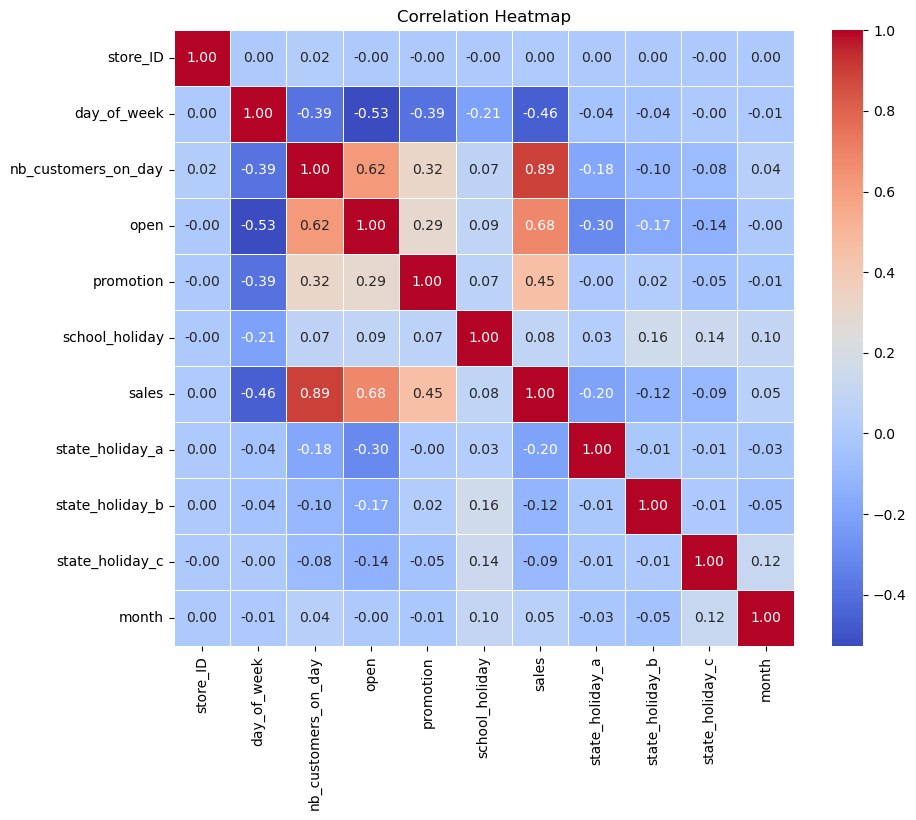

In [38]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')

plt.show()

In [39]:
#For my reference
#The values close to 1 indicate a strong positive correlation, close to -1 a strong negative 
#correlation, and close to 0 little to no correlation.

In [40]:
# checking the value counts for Open column
open_counts = sales['open'].value_counts()
print(open_counts)

1    532016
0    108824
Name: open, dtype: int64


In [41]:
#Here: '1' is when shop is open and '0' is when shop is closed. 
#And I think I should do the prediction for the records when store is open

In [42]:
sales_final = sales[sales['open'] == 1]

In [43]:
sales_final.head() 



,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_a,state_holiday_b,state_holiday_c,month
Unnamed: 0,,,,,,,,,,,
425390,366,4,517,1,0,0,4422,0,0,0,4
291687,394,6,694,1,0,0,8297,0,0,0,4
411278,807,4,970,1,1,0,9729,0,0,0,8
664714,802,2,473,1,1,0,6513,0,0,0,5
540835,726,4,1068,1,1,0,10882,0,0,0,10


In [44]:
sales_final.shape

(532016, 11)

In [45]:
#sales_final dataset contains only 'open' records and we will use this dataset now

In [46]:
# Modelling, Prediction and Evaluation

In [47]:
# X contains the features, and y contains the target variable

#  Here'sales' is our target variable
X =sales_final.drop('sales', axis=1)
y = sales_final['sales']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (425612, 10)
Shape of X_test: (106404, 10)
Shape of y_train: (425612,)
Shape of y_test: (106404,)


In [48]:
#X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [63]:
#Model Selection and Training (XGBoost)

import xgboost as xgb

In [64]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
# Model Evaluation
y_pred = model.predict(X_test)


In [66]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 1253582.1716078897
R2 Score: 0.8695885363363949


In [67]:
#Checking the score and chekc if there is overfitting
print(xgb_reg.score(X_test,y_test))
print(xgb_reg.score(X_train, y_train))

0.8695885363363949
0.8740415170187645


In [69]:
#Since we are using 'XGBRegressor' we can use the 'feature_importance' to understand which features
#contribute to the most of the predictions

In [70]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 nb_customers_on_day    0.613958
promotion              0.190764
store_ID               0.060802
day_of_week            0.045745
month                  0.032754
state_holiday_b        0.018196
school_holiday         0.015567
state_holiday_a        0.015102
state_holiday_c        0.007112
open                   0.000000
dtype: float32


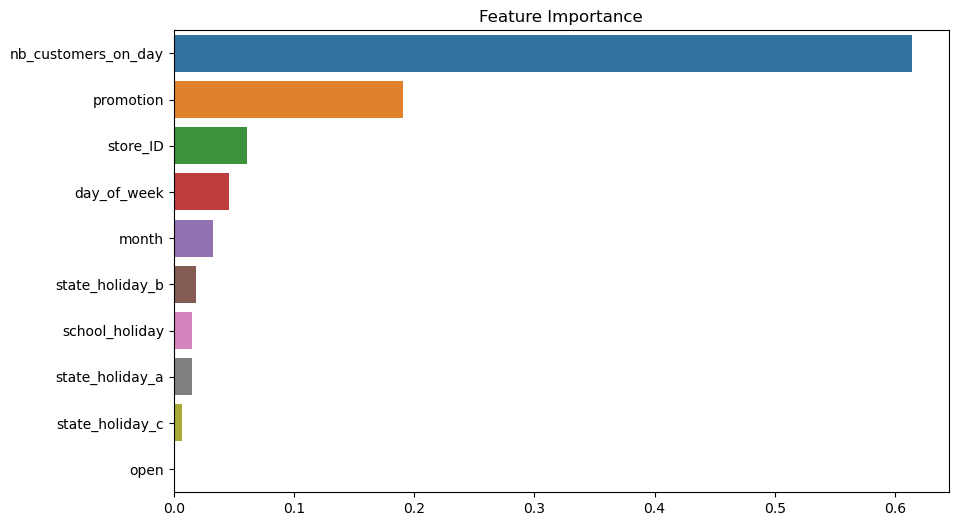

In [71]:
# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()

In [72]:
#Now for training the model,creating a databse for only when stores are open because i think 
#when store is closed we cannot do predictions

In [79]:
import pickle
import joblib

In [80]:
# Save the trained XGBoost model
with open('projectironkaggle_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [82]:
# Load the model
loaded_model = joblib.load('projectironkaggle_model.pkl')
with open('projectironkaggle_model.pkl', 'rb') as file:
    projectironkaggle_model = pickle.load(file)

In [83]:
projectironkaggle_model = pickle.load(open('projectironkaggle_model.pkl', 'rb'))

In [86]:
# Make predictions on the entire dataset
sales_final['predicted_sales'] = model.predict(X)

In [87]:
# Save the document with default index
output_sales = sales_final[['predicted_sales']]
output_sales.to_csv('predicted_sales_output.csv', index=False)

In [95]:
#Uploading the validation dataset#

In [96]:
validation=pd.read_csv('validation_data.csv')
validation.head()


,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371.0,415.0,7.0,01/03/2015,0.0,0.0,0.0,0,0.0
1,558468.0,27.0,7.0,29/12/2013,0.0,0.0,0.0,0,0.0
2,76950.0,404.0,3.0,19/03/2014,657.0,1.0,1.0,0,0.0
3,77556.0,683.0,2.0,29/01/2013,862.0,1.0,0.0,0,0.0
4,456344.0,920.0,3.0,19/03/2014,591.0,1.0,1.0,0,0.0


In [97]:
# creating a function for data cleaning steps

def cleaning(df):
    df['date']=pd.to_datetime(df['date'])
    df=pd.get_dummies(df, columns=['state_holiday'], drop_first=True)
    df['month'] = pd.to_datetime(df['date']).dt.month
    df.drop('date', inplace=True, axis=1)
    df=pd.get_dummies(df, columns=['month'], drop_first=True)
    df=pd.get_dummies(df, columns=['day_of_week'], drop_first=True)
    df.set_index("index", inplace=True)
    return df

In [99]:
#check the function
validation_test =cleaning(validation)

In [100]:
validation_test.head()

,store_ID,nb_customers_on_day,open,promotion,school_holiday,state_holiday_a,month_2.0,month_3.0,month_4.0,month_6.0,month_7.0,month_9.0,month_11.0,month_12.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_6.0,day_of_week_7.0
index,,,,,,,,,,,,,,,,,,,
272371.0,415.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
558468.0,27.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
76950.0,404.0,657.0,1.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
77556.0,683.0,862.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
456344.0,920.0,591.0,1.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [102]:
# Save the cleaning function
with open('cleaning_function.pkl', 'wb') as file:
    pickle.dump(cleaning, file)

In [103]:
# Load the cleaning function
with open('cleaning_function.pkl', 'rb') as file:
    loaded_cleaning_function = pickle.load(file)